# Fase 2: Análisis Exploratorio

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy.stats import zscore

Cargamos el data set limpio

In [6]:
url = 'C:/Users/david.frigerio_softo/Documents/GitHub/Desafio-de-Marketing/data/marketingcampaigns_clean.csv'
df = pd.read_csv(url)

¿Qué canal de marketing se utiliza con mayor frecuencia y cuál genera mejor ROI?
Veamos los canales más utilizads y el ROI por canal

C:\Users\david.frigerio_softo\AppData\Local\Temp\ipykernel_20256\2618559784.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=channel_counts.index, y=channel_counts.values, palette='viridis')


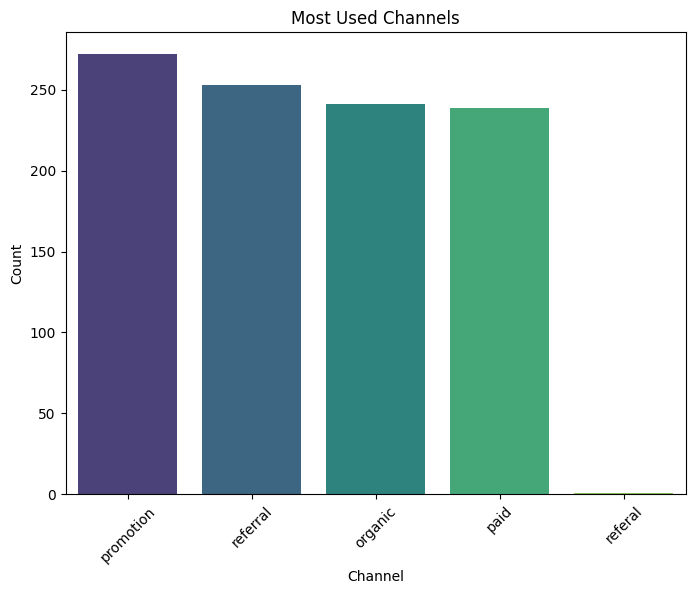

In [9]:
# Count the occurrences of each channel
channel_counts = df['channel'].value_counts()

# Plot the bar chart
plt.figure(figsize=(8, 6))
sns.barplot(x=channel_counts.index, y=channel_counts.values, palette='viridis')
plt.title('Most Used Channels')
plt.xlabel('Channel')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

Veamos la combinación de frecuencia de uso y de rendimiento de cada canal

C:\Users\david.frigerio_softo\AppData\Local\Temp\ipykernel_20256\3585488632.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='channel', y='campaign_count', data=channel_analysis, palette='viridis', ax=ax1)
C:\Users\david.frigerio_softo\AppData\Local\Temp\ipykernel_20256\3585488632.py:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)


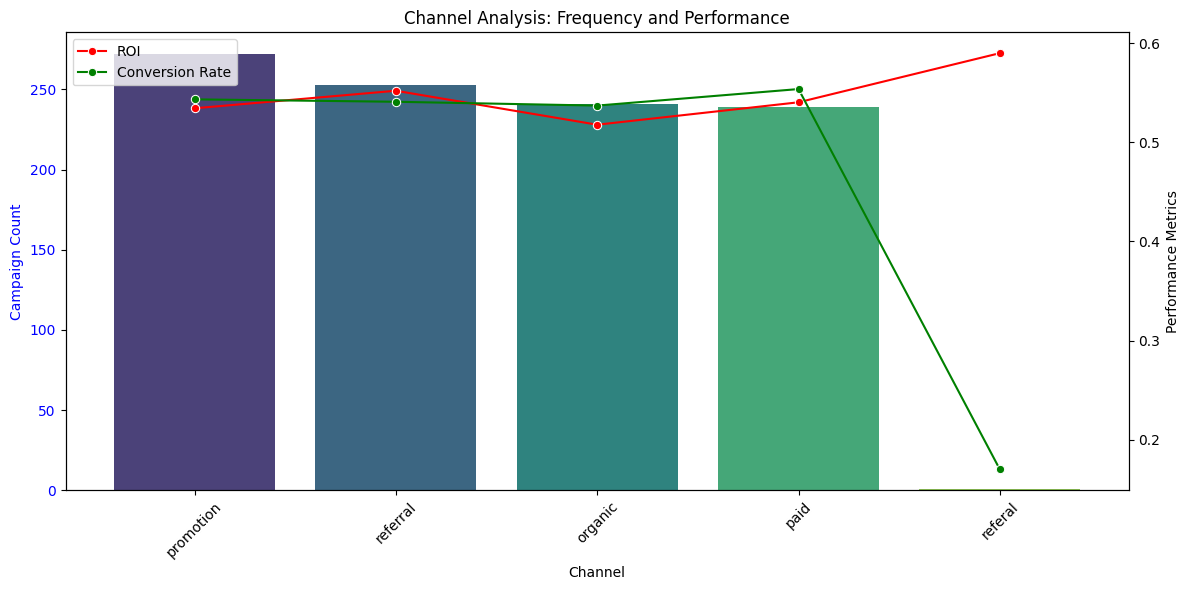

      channel          type       roi  conversion_rate      revenue  \
0     organic         email  0.532353         0.565882  40974485.04   
1     organic       podcast  0.554898         0.485714  24589991.93   
2     organic  social media  0.482833         0.531667  37198381.85   
3     organic       webinar  0.506719         0.550937  31051312.96   
4        paid         email  0.528923         0.510923  35400349.85   
5        paid       podcast  0.501404         0.560526  29346598.78   
6        paid  social media  0.582031         0.549375  34304978.67   
7        paid       webinar  0.546226         0.604340  28013391.00   
8   promotion         email  0.507143         0.569091  36798700.54   
9   promotion       podcast  0.565738         0.511803  33508326.29   
10  promotion  social media  0.541636         0.532909  24900015.10   
11  promotion       webinar  0.531646         0.550000  41295462.35   
12    referal         email  0.590000         0.170000    172882.59   
13   r

In [10]:
# Group by channel and calculate metrics
channel_analysis = df.groupby('channel').agg({
    'roi': 'mean',
    'conversion_rate': 'mean',
    'revenue': 'sum',
    'net_profit': 'sum',
    'campaign_name': 'count'
}).rename(columns={'campaign_name': 'campaign_count'}).reset_index()

# Sort by campaign count for frequency
channel_analysis = channel_analysis.sort_values(by='campaign_count', ascending=False)

# Plot frequency and performance metrics
fig, ax1 = plt.subplots(figsize=(12, 6))

# Bar plot for frequency
sns.barplot(x='channel', y='campaign_count', data=channel_analysis, palette='viridis', ax=ax1)
ax1.set_ylabel('Campaign Count', color='blue')
ax1.set_xlabel('Channel')
ax1.set_title('Channel Analysis: Frequency and Performance')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)

# Line plot for ROI and conversion rate
ax2 = ax1.twinx()
sns.lineplot(x='channel', y='roi', data=channel_analysis, marker='o', color='red', label='ROI', ax=ax2)
sns.lineplot(x='channel', y='conversion_rate', data=channel_analysis, marker='o', color='green', label='Conversion Rate', ax=ax2)
ax2.set_ylabel('Performance Metrics', color='black')
ax2.tick_params(axis='y', labelcolor='black')

# Add legend
ax2.legend(loc='upper left')

plt.tight_layout()
plt.show()

# Segment analysis by campaign type or audience
segment_analysis = df.groupby(['channel', 'type']).agg({
    'roi': 'mean',
    'conversion_rate': 'mean',
    'revenue': 'sum',
    'net_profit': 'sum',
    'campaign_name': 'count'
}).rename(columns={'campaign_name': 'campaign_count'}).reset_index()

print(segment_analysis)